In [1]:
#importing necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, f1_score

In [2]:
data = pd.read_csv(r"D:\Intellipaat\lms assignments\datasets\predicting heart disease datasets\dataset.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
corr = data.corr()
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


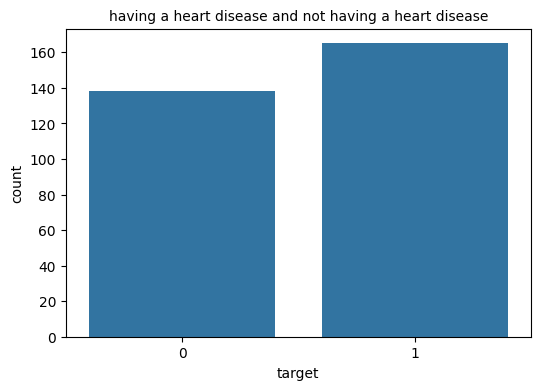

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(x = 'target',data = data)
plt.title('having a heart disease and not having a heart disease',fontsize= 10)
plt.show()

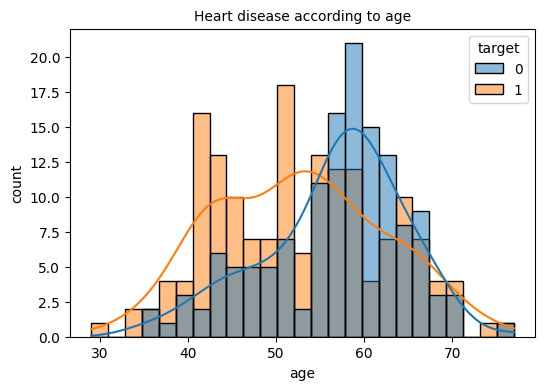

In [6]:
plt.figure(figsize=(6,4))
sns.histplot(x = 'age',data = data,hue = 'target',bins = 25 ,kde = True)
plt.title('Heart disease according to age',fontsize= 10)
plt.xlabel('age')
plt.ylabel('count')
plt.show()

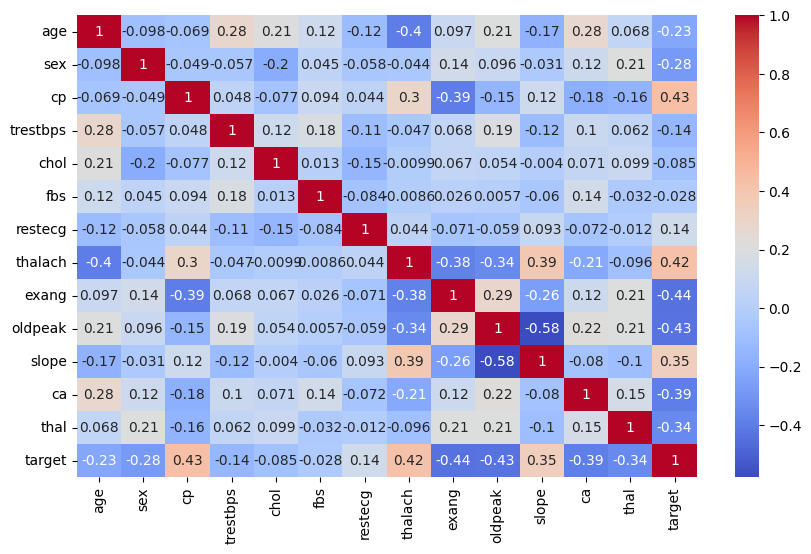

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

In [8]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1:]

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [10]:
#logistic Regression MOdel
Logistic = LogisticRegression()
Logistic.fit(x_train,y_train)

C:\Users\mahes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mahes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
Logistic_pred = Logistic.predict(x_test)
Logistic_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1], dtype=int64)

In [12]:
Logistic_conf = confusion_matrix(y_test,Logistic_pred)
Logistic_conf

array([[32,  9],
       [ 8, 42]], dtype=int64)

In [13]:
Logistic_acc = accuracy_score(y_test,Logistic_pred)
Logistic_acc

0.8131868131868132

In [14]:
# Decision Tree
dec = DecisionTreeClassifier(random_state=42)
dec.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [15]:
dec_pred = dec.predict(x_test)
dec_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1], dtype=int64)

In [16]:
dec_conf = confusion_matrix(y_test,dec_pred)
dec_conf

array([[32,  9],
       [15, 35]], dtype=int64)

In [17]:
dec_acc = accuracy_score(y_test,dec_pred)
dec_acc

0.7362637362637363

In [18]:
#random forest
ran = RandomForestClassifier()
ran.fit(x_train,y_train)

C:\Users\mahes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [19]:
ran_pred = dec.predict(x_test)
ran_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1], dtype=int64)

In [20]:
ran_conf = confusion_matrix(y_test,ran_pred)
ran_conf

array([[32,  9],
       [15, 35]], dtype=int64)

In [21]:
ran_acc = accuracy_score(y_test,ran_pred)
ran_acc

0.7362637362637363

In [22]:
#confusion matrix of all classifiers
print('Confusion martix of logistic regression :', Logistic_conf)
print('Confusion martix of decision tree :',dec_conf)
print('Confusion martix of random forest :',ran_conf)

Confusion martix of logistic regression : [[32  9]
 [ 8 42]]
Confusion martix of decision tree : [[32  9]
 [15 35]]
Confusion martix of random forest : [[32  9]
 [15 35]]


In [23]:
#confusion matrix of all classifiers
print('Confusion martix of logistic regression :', Logistic_conf)
print('Confusion martix of decision tree :',dec_conf)
print('Confusion martix of random forest :',ran_conf)

Confusion martix of logistic regression : [[32  9]
 [ 8 42]]
Confusion martix of decision tree : [[32  9]
 [15 35]]
Confusion martix of random forest : [[32  9]
 [15 35]]


In [24]:

# For Logistic Regression
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, Logistic_pred))

# For Decision Tree
print("\nClassification Report for Decision Tree:")
print(classification_report(y_test, dec_pred))
# Random forest
print("\nClassification Report for Random Forest:")
print(classification_report(y_test,ran_pred))


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.68      0.78      0.73        41
           1       0.80      0.70      0.74        50

    accuracy                           0.74        91
   macro avg       0.74      0.74      0.74        91
weighted avg       0.74      0.74      0.74        91


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.68      0.78      0.73        41
           1       0.80      0.70      0.74        50

    accuracy                           0.74        

In [25]:
def calculate_metrics(y_true, y_pred, classifier_name):
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"Metrics for {classifier_name}:")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}\n")

calculate_metrics(y_test, Logistic_pred, "Logistic Regression")
calculate_metrics(y_test, dec_pred, "Decision Tree")
calculate_metrics(y_test, ran_pred, "Random Forest")


Metrics for Logistic Regression:
Precision: 0.8129
Recall: 0.8132
F1 Score: 0.8130

Metrics for Decision Tree:
Precision: 0.7438
Recall: 0.7363
F1 Score: 0.7368

Metrics for Random Forest:
Precision: 0.7438
Recall: 0.7363
F1 Score: 0.7368



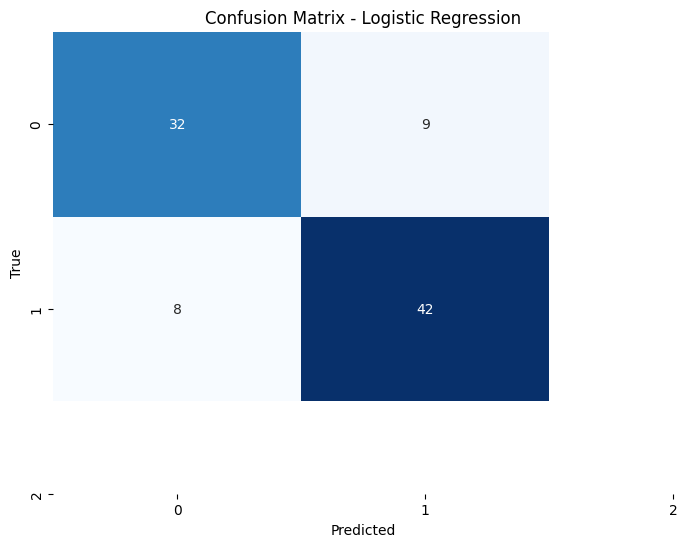

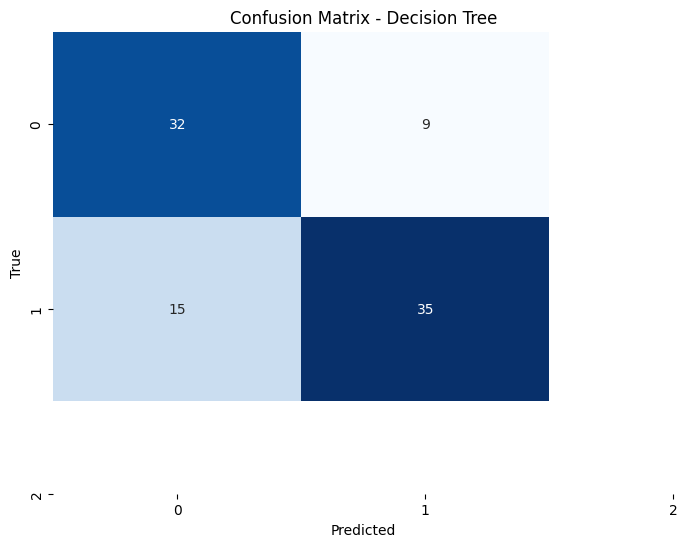

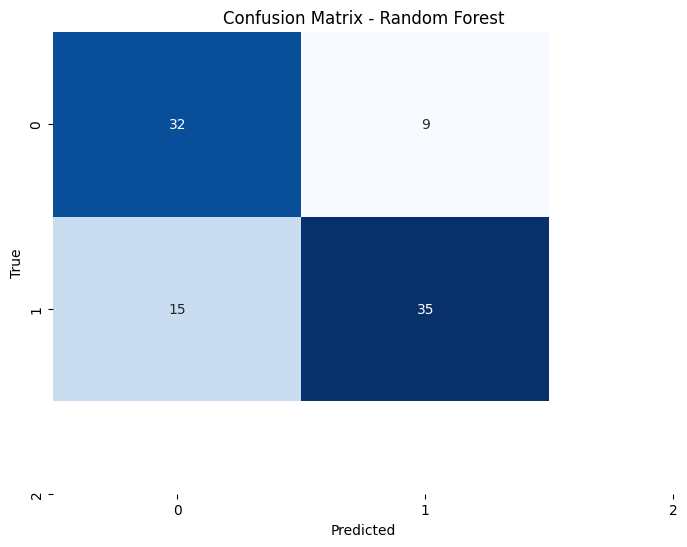

In [26]:
conf_matrix_logistic = confusion_matrix(y_test, Logistic_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logistic, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

conf_matrix_decision_tree = confusion_matrix(y_test, dec_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_decision_tree, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

conf_matrix_random_forest = confusion_matrix(y_test, ran_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_random_forest, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [27]:
accuracy_logistic = accuracy_score(y_test, Logistic_pred)
accuracy_decision_tree = accuracy_score(y_test, dec_pred)
accuracy_random_forest = accuracy_score(y_test, ran_pred)

print("Accuracy for Logistic Regression:", accuracy_logistic)
print("Accuracy for Decision Tree:", accuracy_decision_tree)
print("Accuracy for Random Forest:", accuracy_random_forest)

best_model = max([
    ('Logistic Regression', accuracy_logistic),
    ('Decision Tree', accuracy_decision_tree),
    ('Random Forest', accuracy_random_forest)
], key=lambda x: x[1])

print("\nBest Model:")
print(f"Classifier: {best_model[0]}")
print(f"Accuracy: {best_model[1]:.4f}")


Accuracy for Logistic Regression: 0.8131868131868132
Accuracy for Decision Tree: 0.7362637362637363
Accuracy for Random Forest: 0.7362637362637363

Best Model:
Classifier: Logistic Regression
Accuracy: 0.8132
